In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
import csv
import pandas as pd

from pydmd import HODMD

In [8]:
data = np.loadtxt(fname='datasets/MI_timesteps.txt', skiprows=1001)

<function matplotlib.pyplot.show(close=None, block=None)>

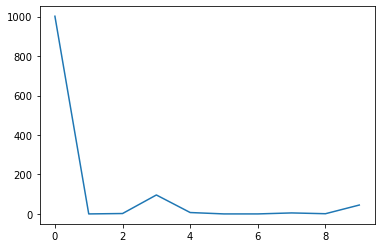

In [9]:
plt.plot(data[1])
plt.show

In [10]:
print(data)

[[1.0010e+03 0.0000e+00 2.0000e+00 ... 5.0000e+00 1.0000e+00 4.3000e+01]
 [1.0020e+03 0.0000e+00 2.0000e+00 ... 5.0000e+00 1.0000e+00 4.5000e+01]
 [1.0030e+03 0.0000e+00 2.0000e+00 ... 5.0000e+00 0.0000e+00 4.6000e+01]
 ...
 [1.4999e+04 0.0000e+00 1.0000e+01 ... 2.0000e+00 1.0000e+00 4.0000e+01]
 [1.5000e+04 0.0000e+00 1.0000e+01 ... 3.0000e+00 1.0000e+00 4.1000e+01]
 [1.5001e+04 0.0000e+00 1.1000e+01 ... 1.0000e+00 0.0000e+00 4.2000e+01]]


In [11]:
def load_data():
    filename = 'datasets/MI_timesteps.txt'
    with open(filename, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=' ')
        next(reader)
        rows = []
        for row in reader:
            rows.append(row)
        return rows

In [12]:
data = load_data()

In [14]:
print(data[1])

['2', '36', '0', '0', '0', '0', '0', '0', '0', '0']


In [16]:
df = pd.read_csv('datasets/MI_timesteps.txt', sep=" ")
df = df.drop(['timeStep'], axis=1)
df = df = df.iloc[1000:]

In [17]:
df

,areaDensityCounting-PID5,areaDensityCounting-PID6,areaDensityCounting-PID7,areaDensityCounting-PID8,areaDensityCounting-PID9,areaDensityCounting-PID10,areaDensityCounting-PID11,areaDensityCounting-PID12,areaDensityCounting-PID13
1000,0,2,97,7,0,0,5,1,43
1001,0,2,96,7,0,0,5,1,45
1002,0,2,95,6,0,0,5,0,46
1003,0,2,94,6,0,0,4,1,46
1004,0,2,92,6,0,0,5,0,46
...,...,...,...,...,...,...,...,...,...
14996,0,10,95,4,0,0,2,1,39
14997,0,10,94,3,0,0,3,1,39
14998,0,10,93,3,0,1,2,1,40
14999,0,10,93,3,0,1,3,1,41


In [32]:
indexlist = df.index.to_numpy()

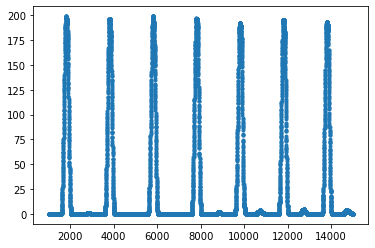

In [33]:
x = indexlist
y = df['areaDensityCounting-PID5'].to_numpy()
snapshots = y
plt.plot(x, snapshots, '.')
plt.show()

In [34]:
hodmd = HODMD(svd_rank=0, exact=True, opt=True, d=30).fit(snapshots)

In [35]:
hodmd.reconstructed_data.shape

(1, 14001)

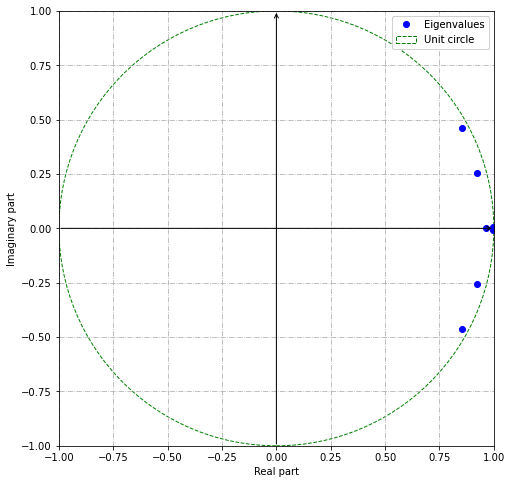

In [36]:
hodmd.plot_eigs()

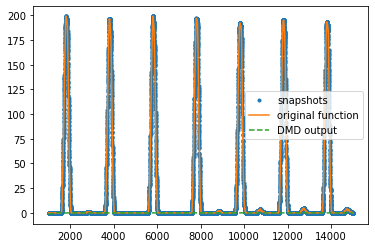

In [37]:
hodmd.original_time['dt'] = hodmd.dmd_time['dt'] = x[1] - x[0]
hodmd.original_time['t0'] = hodmd.dmd_time['t0'] = x[0]
hodmd.original_time['tend'] = hodmd.dmd_time['tend'] = x[-1]

plt.plot(hodmd.original_timesteps, snapshots, '.', label='snapshots')
plt.plot(hodmd.original_timesteps, y, '-', label='original function')
plt.plot(hodmd.dmd_timesteps, hodmd.reconstructed_data[0].real, '--', label='DMD output')
plt.legend()
plt.show()

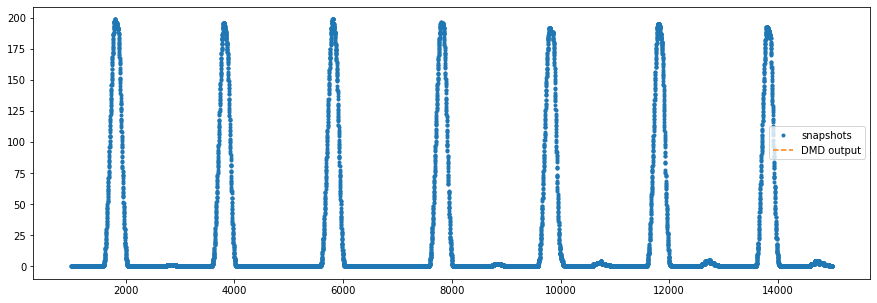

In [39]:
hodmd.dmd_time['tend'] = 50

fig = plt.figure(figsize=(15, 5))
plt.plot(hodmd.original_timesteps, snapshots, '.', label='snapshots')
plt.plot(hodmd.dmd_timesteps, hodmd.reconstructed_data[0].real, '--', label='DMD output')
plt.legend()
plt.show()